# Stretched Exponential Fitting

In [1]:
from TRPL_functions import *
color_prism = ['#1D6996','#38A6A5','#0F8554','#73AF48','#EDAD08','#E17C05','#CC503E','#94346E','#6F4070','#994E95','#666666']

### 1. Set Parameters

In [2]:
# Set the Datafolder
folder = r'\Example_Data'

# Measurement Settings
Intensity = 10                  # Setting used in 'Signal Path'


file_selector, reference_selector = make_widgets(folder)

### 2. Select Files


##### a. Laser Reference File


In [3]:
reference_selector

Select(description='Ref. Files', options=('2024_03_06_TRPL_Laserpower.txt', '2022_05_01_TRPL_Laserpower.txt'),…

##### b. Data File(s)

In [4]:
file_selector

SelectMultiple(description='Files', options=(' MBG_Glass_Air_OD0.5_fit-values_stretch.txt', ' MBG_Glass_Air_OD…

### 3. Import and Format Data

In [5]:
Data, param_dict = import_data(folder, file_selector.value, reference_selector.value, Intensity)

### 4. 1/e Lifetime

In [7]:
param_dict = one_over_e_Lifetime(Data, param_dict)
print(param_dict['tau-1/e (ns)'])

0    241.0
1    128.0
2    386.0
Name: tau-1/e (ns), dtype: object


### 5. Stretched Exponential Fitting

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 44
    # data points      = 4503
    # variables        = 6
    chi-square         = 2.76476051
    reduced chi-square = 6.1480e-04
    Akaike info crit   = -33290.1396
    Bayesian info crit = -33251.6646
[[Variables]]
    tau_1:   235.937098 +/- 1.38780348 (0.59%) (init = 600)
    beta_1:  0.62698098 +/- 0.00294057 (0.47%) (init = 0.5)
    A_1:     1 (fixed)
    tau_2:   133.656842 +/- 1.07239042 (0.80%) (init = 600)
    beta_2:  0.54904003 +/- 0.00262257 (0.48%) (init = 0.5)
    A_2:     1 (fixed)
    tau_3:   364.524058 +/- 1.68725506 (0.46%) (init = 600)
    beta_3:  0.67629281 +/- 0.00331900 (0.49%) (init = 0.5)
    A_3:     1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(tau_2, beta_2) = 0.898
    C(tau_1, beta_1) = 0.855
    C(tau_3, beta_3) = 0.783


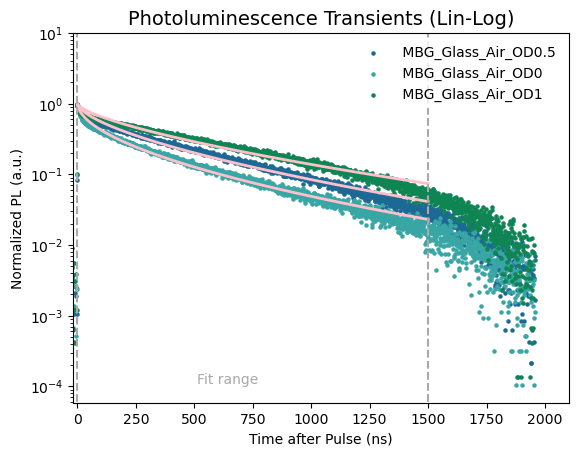

In [169]:
###################################################################
# Fit Settings
share_stretch_factor    = False    # False or True
t_0_equals_1            = True     # False or True
Fit_range               = [0, 1500] # in ns

###################################################################


Data_fit, param_dict = fit_stretched_exponential(Data, Fit_range, t_0_equals_1, share_stretch_factor, param_dict, folder)

import matplotlib.pyplot as plt

for i,_ in enumerate(file_selector.value):
    plt.scatter(Data_fit['Time'], Data_fit[str(param_dict['Sample Name'][i])], s=5, c=color_prism[i], alpha=1, label=param_dict['Sample Name'][i])
    plt.plot(Data_fit['Time'], Data_fit[str('Fit_' + param_dict['Sample Name'][i])], c='pink', linewidth=2)





plt.vlines((Fit_range[0], Fit_range[1]), ymin=0, ymax=10, color='darkgrey', linestyles='--')
plt.annotate('Fit range' ,[(Fit_range[1]-Fit_range[0])/3/np.array(Data_fit['Time']).max(), 0.05] , xycoords='axes fraction', color='darkgrey')

plt.title('Photoluminescence Transients (Lin-Log)', fontsize=14)
plt.yscale('log')
plt.xlim(left=-20)
plt.ylim(top=10)
plt.xlabel('Time after Pulse (ns)')
plt.ylabel('Normalized PL (a.u.)')
plt.legend(frameon=True, edgecolor='w')

file_name = param_dict['Sample Name'][0]
#plt.savefig(f'{folder}/{file_name}_figure_stretch.png'))), format='png',dpi=100)

plt.show()